In [22]:
import numpy as np
import h5py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D,Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
def load_dataset():
    fn = 'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) 
    Y_train = np.array(train_dataset["train_set_y"][:]) 

    fn ='data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) 
    Y_test = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 

    return X_train, Y_train, X_test, Y_test, classes

In [24]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

print ('train_data.shape=', X_train.shape)
print ('train_labels.shape=',  Y_train.shape)
print ('test_data.shape=', X_test.shape)
print ('test_labels.shape=', Y_test.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1080,)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (120,)


In [25]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

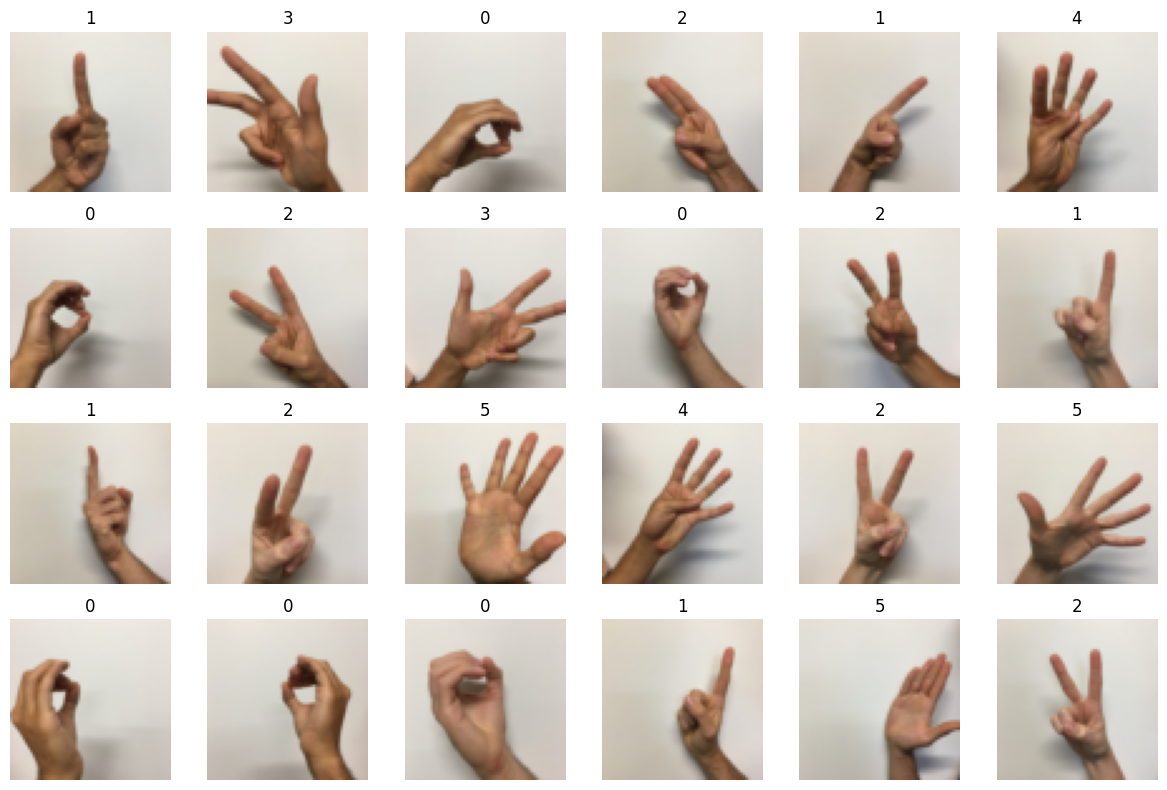

In [26]:
plt.figure(figsize= (12,8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y= Y_train.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [28]:
datagen.fit(X_train)

In [29]:
# Define the model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080,)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120,)


In [32]:
epochs = 10
batch_size = 30
history = model.fit(X_train, to_categorical(Y_train.T), epochs=epochs, batch_size=batch_size, validation_data=(X_test, to_categorical(Y_test.T)))

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2657 - loss: 39.5867 - val_accuracy: 0.5000 - val_loss: 1.3602
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6389 - loss: 0.9150 - val_accuracy: 0.7250 - val_loss: 0.7096
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8639 - loss: 0.4304 - val_accuracy: 0.7667 - val_loss: 0.6469
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8556 - loss: 0.4257 - val_accuracy: 0.7083 - val_loss: 0.6672
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9056 - loss: 0.3041 - val_accuracy: 0.8000 - val_loss: 0.5521
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9491 - loss: 0.1655 - val_accuracy: 0.8167 - val_loss: 0.4182
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9806 - loss: 0.0695 - val_accuracy: 0.8667 - val_loss: 0.4779
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.8583 - 

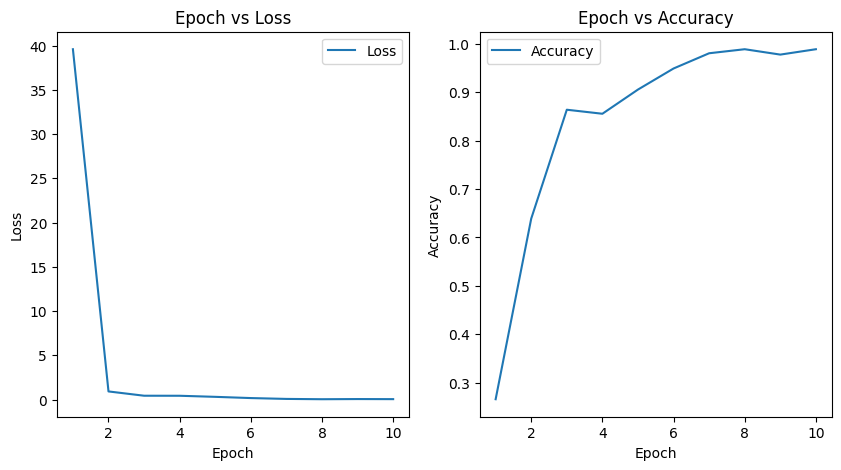

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.history['loss'], label='Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final training accuracy: {train_accuracy:.2f}%")
print(f"Final validation accuracy: {val_accuracy:.2f}%")
print(f"Final training loss: {train_loss:.4f}")
print(f"Final validation loss: {val_loss:.4f}")

Final training accuracy: 98.89%
Final validation accuracy: 80.83%
Final training loss: 0.0442
Final validation loss: 0.5339
